In [21]:
import nltk.stem
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer, PorterStemmer
import numpy as np

In [4]:
mainDf = pd.read_csv("mainJustice.csv")
mainDf = mainDf.drop(['Unnamed: 0'], axis=1)
mainDf

,ID,facts,issue_area,first_party_winner
0,50606,"<p>In 1970, Jane Roe (a fictional name used in...",3,1
1,50613,<p>Joan Stanley had three children with Peter ...,0,1
2,50623,<p>John Giglio was convicted of passing forged...,1,1
3,50632,"<p>The Idaho Probate Code specified that """"""""m...",0,1
4,50643,"<p>Miller, after conducting a mass mailing cam...",2,1
...,...,...,...,...
3283,63323,<p>Tarahrick Terry pleaded guilty to one count...,3,0
3284,63324,"<p>Refugio Palomar-Santiago, a Mexican nationa...",3,1
3285,63331,<p>Joshua James Cooley was parked in his picku...,0,1
3286,63332,<p>This is an ongoing case of original jurisdi...,3,0


In [5]:
documents = []
X = mainDf["facts"]

for i in range(0, len(X)):
  document = re.sub(r"\W", " ", str(X[i]))
  document = re.sub(r"\d+", " ", document)
  document = re.sub(r'\b\w{1,1}\b', " ", document)
  document = re.sub(" \d+", " ", document)
  document = re.sub(r"\s+", " ", document, flags=re.I)
  document = document.lower()
  documents.append(document)

In [6]:
tokenDocuments = []
for i in range(0, len(X)):
    tokenDocuments.append(word_tokenize(documents[i]))

In [7]:
stop_words = stopwords.words("english")

In [8]:
cleanTokenDocuments = []

for i in range(0, len(X)):
    cleanTokenDocument = []
    for word in tokenDocuments[i]:
        if word not in stop_words:
            cleanTokenDocument.append(word)
    cleanTokenDocuments.append(cleanTokenDocument)

In [9]:
mainDf["facts"] = cleanTokenDocuments

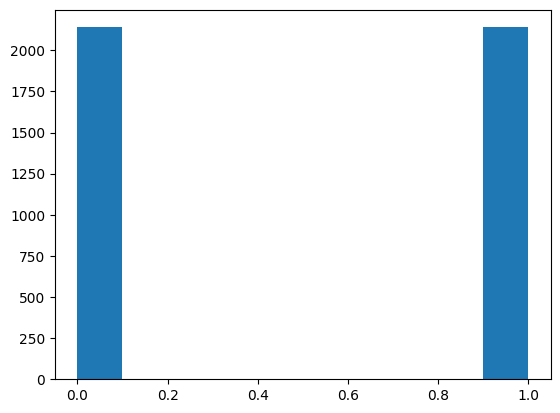

In [10]:
max_size = mainDf["first_party_winner"].value_counts().max() 
lst = [mainDf]
for class_index, group in mainDf.groupby('first_party_winner'):
    lst.append(group.sample(max_size-len(group), replace=True))
balancedMainDf = pd.concat(lst)
balancedMainDf.index = range(len(balancedMainDf))
plt.hist(balancedMainDf["first_party_winner"])
plt.show()

In [11]:
len(balancedMainDf)

4280

In [41]:
words_set = set()
 
for doc in mainDf["facts"]:
    for word in doc:
        if word not in words_set:
            words_set.add(word)
     
print('Number of words in the corpus:',len(words_set))
#print('The words in the corpus: \n', words_set)

Number of words in the corpus: 18897


In [12]:
lemma = WordNetLemmatizer()

mainDf["lemma"] = mainDf["facts"].apply(lambda x: [lemma.lemmatize(y) for y in x])

In [22]:
postagDocuments = []
for sen in mainDf["lemma"]:
    postagDocuments.append(pos_tag(sen))

mainDf["lemmaPos"] = postagDocuments

,ID,facts,issue_area,first_party_winner,lemma,stem,lemmaPos
0,50606,"[jane, roe, fictional, name, used, court, docu...",3,1,"[jane, roe, fictional, name, used, court, docu...","[(jane, NN), (roe, VBZ), (fictional, JJ), (nam...","[(jane, NN), (roe, VBZ), (fictional, JJ), (nam..."
1,50613,"[joan, stanley, three, children, peter, stanle...",0,1,"[joan, stanley, three, child, peter, stanley, ...","[(joan, NN), (stanley, VBD), (three, CD), (chi...","[(joan, NN), (stanley, VBD), (three, CD), (chi..."
2,50623,"[john, giglio, convicted, passing, forged, mon...",1,1,"[john, giglio, convicted, passing, forged, mon...","[(john, NN), (giglio, NN), (convicted, VBD), (...","[(john, NN), (giglio, NN), (convicted, VBD), (..."
3,50632,"[idaho, probate, code, specified, males, must,...",0,1,"[idaho, probate, code, specified, male, must, ...","[(idaho, JJ), (probate, NN), (code, NN), (spec...","[(idaho, JJ), (probate, NN), (code, NN), (spec..."
4,50643,"[miller, conducting, mass, mailing, campaign, ...",2,1,"[miller, conducting, mass, mailing, campaign, ...","[(miller, NN), (conducting, VBG), (mass, NN), ...","[(miller, NN), (conducting, VBG), (mass, NN), ..."
...,...,...,...,...,...,...,...
3283,63323,"[tarahrick, terry, pleaded, guilty, one, count...",3,0,"[tarahrick, terry, pleaded, guilty, one, count...","[(tarahrick, NN), (terry, NN), (pleaded, VBD),...","[(tarahrick, NN), (terry, NN), (pleaded, VBD),..."
3284,63324,"[refugio, palomar, santiago, mexican, national...",3,1,"[refugio, palomar, santiago, mexican, national...","[(refugio, NN), (palomar, NN), (santiago, JJ),...","[(refugio, NN), (palomar, NN), (santiago, JJ),..."
3285,63331,"[joshua, james, cooley, parked, pickup, truck,...",0,1,"[joshua, james, cooley, parked, pickup, truck,...","[(joshua, NN), (james, NNS), (cooley, VBP), (p...","[(joshua, NN), (james, NNS), (cooley, VBP), (p..."
3286,63332,"[ongoing, case, original, jurisdiction, facts,...",3,0,"[ongoing, case, original, jurisdiction, fact, ...","[(ongoing, VBG), (case, NN), (original, JJ), (...","[(ongoing, VBG), (case, NN), (original, JJ), (..."


In [38]:
postags = []

for sen in mainDf["lemmaPos"]:
    for w in sen:
        if w[1] not in postags:
            postags.append(w[1])

In [26]:
ps = PorterStemmer()

stemDocuments = []
for sen in mainDf["facts"]:
    stemDocument = []
    for w in sen:
        rootWord=ps.stem(w)
        stemDocument.append(rootWord)
    stemDocuments.append(stemDocument)

mainDf["stem"] = stemDocuments

In [29]:
words_set = set()
 
for doc in mainDf["stem"]:
    for word in doc:
        if word not in words_set:
            words_set.add(word)
     
print('Number of words in the corpus:',len(words_set))
#print('The words in the corpus: \n', words_set)

Number of words in the corpus: 12849


In [ ]:
postagDocuments = []
for sen in mainDf["stem"]:
    postagDocuments.append(pos_tag(sen))

mainDf["stemPos"] = postagDocuments

In [36]:
postags = []

for sen in mainDf["stemPos"]:
    for w in sen:
        if w[1] not in postags:
            postags.append(w[1])

In [ ]:
postags

In [53]:
minuBetweenWords = 200000
maxBetweenWords = 0
for i in mainDf["facts"]:
    if len(i) <= minuBetweenWords:
        minuBetweenWords = len(i)
    if len(i) >= maxBetweenWords:
        maxBetweenWords = len(i)

In [162]:
mainDf

,ID,facts,issue_area,first_party_winner,lemma
0,50606,"[jane, roe, fictional, name, used, court, docu...",3,1,"[jane, roe, fictional, name, used, court, docu..."
1,50613,"[joan, stanley, three, children, peter, stanle...",0,1,"[joan, stanley, three, child, peter, stanley, ..."
2,50623,"[john, giglio, convicted, passing, forged, mon...",1,1,"[john, giglio, convicted, passing, forged, mon..."
3,50632,"[idaho, probate, code, specified, males, must,...",0,1,"[idaho, probate, code, specified, male, must, ..."
4,50643,"[miller, conducting, mass, mailing, campaign, ...",2,1,"[miller, conducting, mass, mailing, campaign, ..."
...,...,...,...,...,...
3283,63323,"[tarahrick, terry, pleaded, guilty, one, count...",3,0,"[tarahrick, terry, pleaded, guilty, one, count..."
3284,63324,"[refugio, palomar, santiago, mexican, national...",3,1,"[refugio, palomar, santiago, mexican, national..."
3285,63331,"[joshua, james, cooley, parked, pickup, truck,...",0,1,"[joshua, james, cooley, parked, pickup, truck,..."
3286,63332,"[ongoing, case, original, jurisdiction, facts,...",3,0,"[ongoing, case, original, jurisdiction, fact, ..."


In [14]:
words_set = set()
 
for doc in mainDf["lemma"]:
    for word in doc:
        if word not in words_set:
            words_set.add(word)
     
print('Number of words in the corpus:',len(words_set))
#print('The words in the corpus: \n', words_set)

Number of words in the corpus: 16957


In [15]:
n_docs = len(mainDf["lemma"])         #·Number of documents in the corpus
n_words_set = len(words_set) #·Number of unique words in the
 
df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=list(words_set))
 
# Compute Term Frequency (TF)
for i in range(n_docs):
    for doc in mainDf["lemma"]:
        for w in doc:
            df_tf[w][i] = df_tf[w][i] + (1 / len(doc))
         
df_tf

KeyboardInterrupt: 